In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

**EXPLORING THE DATASET**

In [5]:
data = pd.read_csv('archive/PS_20174392719_1491204439457_log.csv')
                   

In [6]:
data.shape

(6362620, 11)

In [7]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**HANDLING DUPLICATE ROWS**

In [10]:
if data.duplicated().sum() == 0:
   print("No duplicate rows found")
else:
    pint(f"Yes, there are {data.duplicated().sum()} duplicate rows in the dtataset \n")
    data.drop_duplicates(inplace=True)
    print(data.shape)

No duplicate rows found


**HANDLING MISSING VALUES**

In [11]:
if data.isnull().values.any():
    print("Unfortunately there are null values in the dataset \n")
    print(data.isnull().sum())
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


**HANDLING OUTLIERS**

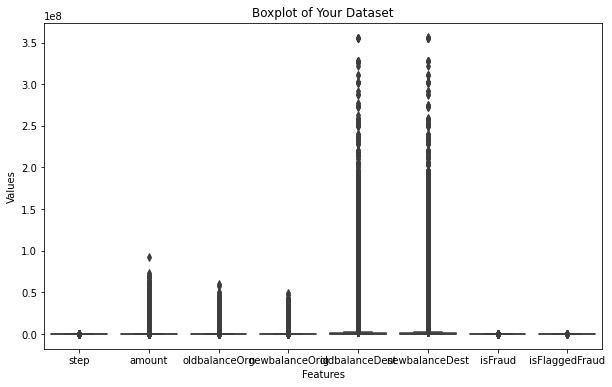

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title('Boxplot of Your Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

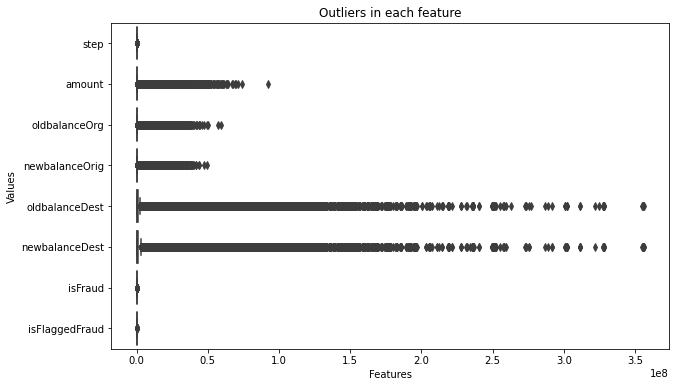

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , orient='h')
plt.title('Outliers in each feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

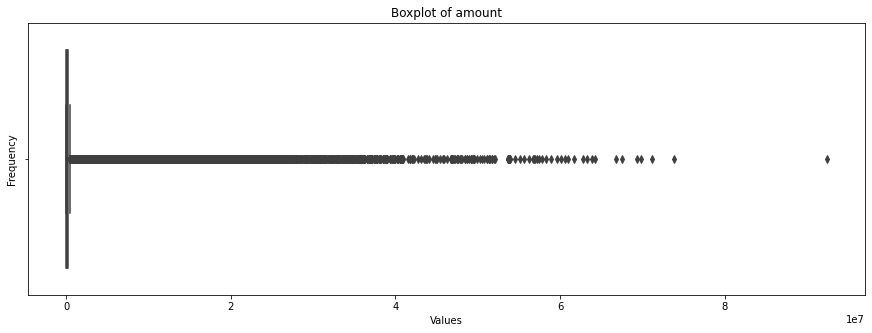

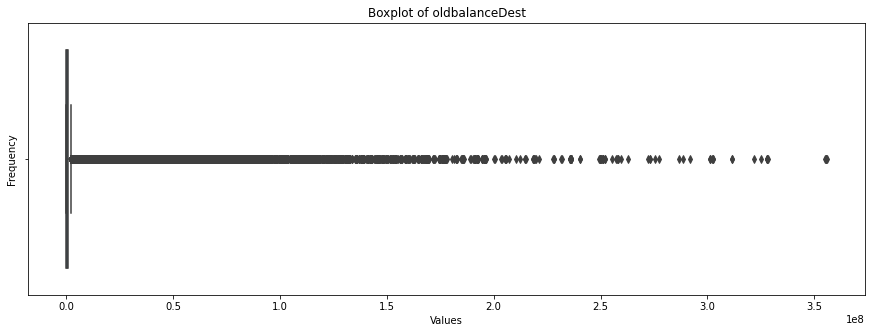

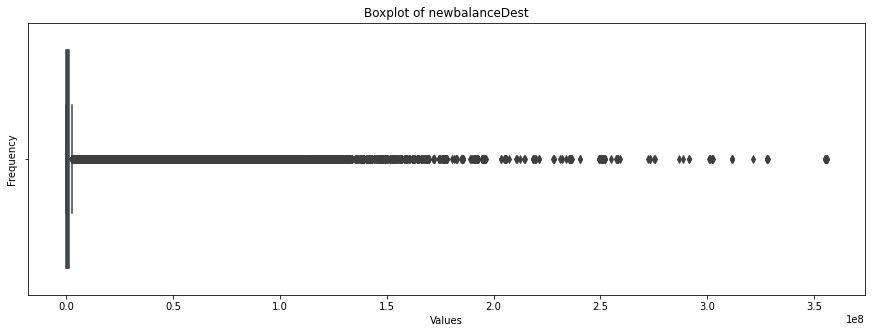

In [14]:
coloumns_to_plot = ['amount', 'oldbalanceDest', 'newbalanceDest'] 
for coloumn in coloumns_to_plot:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=data[coloumn])
    plt.title(f'Boxplot of {coloumn}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    
    plt.show()
                

In [15]:
features = ['amount', 'oldbalanceDest', 'newbalanceDest'] 
for feature in features:
    lower_bound = data[feature].quantile(0.05)
    upper_bound = data[feature].quantile(0.95)
    outliers = (data[feature] < lower_bound) | (data[feature] > upper_bound)
    data = data[~outliers]
    
print(data.shape)

(5168039, 11)


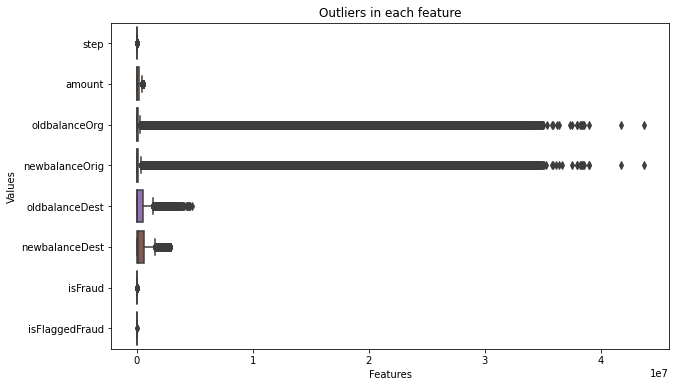

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data , orient='h')
plt.title('Outliers in each feature')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

**DATA EXPLORATION**

In [17]:
data['type'].unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [18]:
data['type'].value_counts()

PAYMENT     1876452
CASH_OUT    1858616
CASH_IN     1181942
TRANSFER     228442
DEBIT         22587
Name: type, dtype: int64

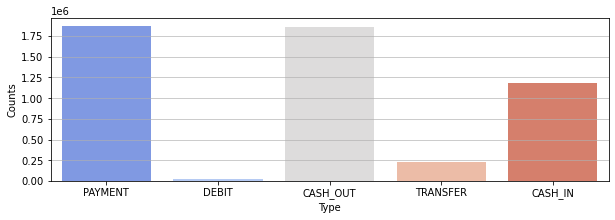

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(data = data , palette='coolwarm' , x = 'type')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.8)
plt.show()

In [20]:
data['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [21]:
data['type'].value_counts()

1    1876452
0    1858616
2    1181942
3     228442
4      22587
Name: type, dtype: int64

In [22]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0
10,1,4,9644.94,C1900366749,4465.00,0.00,C997608398,10845.0,157982.12,0,0
11,1,1,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.00,0,0
12,1,1,2560.74,C1648232591,5070.00,2509.26,M972865270,0.0,0.00,0,0


**EXPLORING 'isFraud' FEATURE**

In [23]:
data.isFraud.unique()

array([0, 1])

In [24]:
data['isFraud'].value_counts()

0    5163916
1       4123
Name: isFraud, dtype: int64

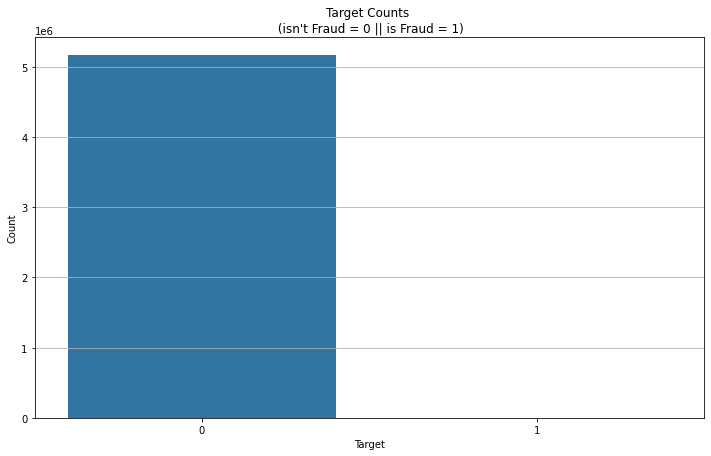

In [25]:
Target_counts = data['isFraud'].value_counts()

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

**DROPPING UNECESSARY FEATURE**

In [26]:
data.drop(['nameOrig','nameDest'] , axis = 1 , inplace = True)

In [27]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [28]:
data.shape

(5168039, 9)

**FEATURE EXTRACTION**

In [29]:
data.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006730,-0.013481,-0.012156,-0.011885,-0.009932,-0.022277,0.023976,0.001632
type,0.006730,1.000000,0.019814,0.310743,0.324105,0.039126,-0.074857,0.018671,0.001408
amount,-0.013481,0.019814,1.000000,0.088077,0.098288,0.356692,0.427751,0.016436,0.001372
oldbalanceOrg,-0.012156,0.310743,0.088077,1.000000,0.999482,0.194578,0.109648,-0.006374,0.000980
newbalanceOrig,-0.011885,0.324105,0.098288,0.999482,1.000000,0.199321,0.109915,-0.008269,0.000963
oldbalanceDest,-0.009932,0.039126,0.356692,0.194578,0.199321,1.000000,0.965340,-0.009953,-0.000396
newbalanceDest,-0.022277,-0.074857,0.427751,0.109648,0.109915,0.965340,1.000000,-0.007713,-0.000424
isFraud,0.023976,0.018671,0.016436,-0.006374,-0.008269,-0.009953,-0.007713,1.000000,0.022016
isFlaggedFraud,0.001632,0.001408,0.001372,0.000980,0.000963,-0.000396,-0.000424,0.022016,1.000000


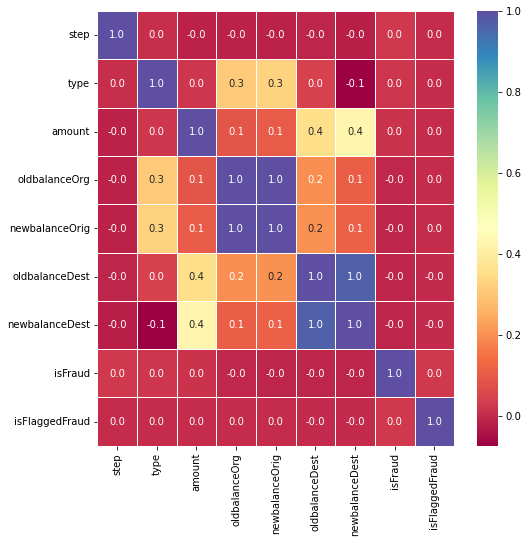

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True , linewidths=0.9 , fmt = ".1f" , cmap = 'Spectral')
plt.show()

**⚑ Correlation between oldbalanceOrg and newbalanceOrig = (0.99)**

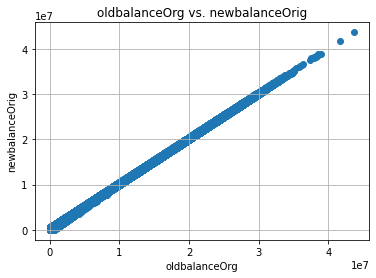

In [31]:
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

**⚑ Correlation between oldbalanceDest and newbalanceDest = (0.97)**

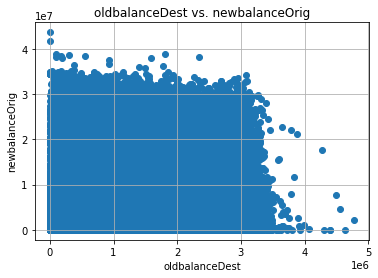

In [32]:
plt.scatter(data['oldbalanceDest'], data['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceDest')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceDest vs. newbalanceOrig')
plt.grid(True)
plt.show()

**DROPPING UNECESSARY FEATURES BASED ON CORRELATION**

In [33]:
data.drop(['isFlaggedFraud'] , axis = 1 , inplace = True)
data.drop(['step'] , axis = 1 , inplace = True)

In [34]:
data.columns


Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [35]:
data.shape

(5168039, 7)

In [36]:
data.info

<bound method DataFrame.info of          type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1    9839.64      170136.00       160296.36            0.00   
4           1   11668.14       41554.00        29885.86            0.00   
5           1    7817.71       53860.00        46042.29            0.00   
6           1    7107.77      183195.00       176087.23            0.00   
7           1    7861.64      176087.23       168225.59            0.00   
...       ...        ...            ...             ...             ...   
6362609     0  258355.42      258355.42            0.00        25176.67   
6362610     3   63416.99       63416.99            0.00            0.00   
6362611     0   63416.99       63416.99            0.00       276433.18   
6362614     3  339682.13      339682.13            0.00            0.00   
6362615     0  339682.13      339682.13            0.00            0.00   

         newbalanceDest  isFraud  
0                  0.00        0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168039 entries, 0 to 6362615
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 315.4 MB


In [38]:
data.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.0,0.00,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,4024.36,2671.00,0.00,0.0,0.00,0
9,4,5337.77,41720.00,36382.23,41898.0,40348.79,0
10,4,9644.94,4465.00,0.00,10845.0,157982.12,0
11,1,3099.97,20771.00,17671.03,0.0,0.00,0
12,1,2560.74,5070.00,2509.26,0.0,0.00,0


In [39]:
data.tail(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362604,3,54652.46,54652.46,0.0,0.00,0.00,1
6362605,0,54652.46,54652.46,0.0,0.00,54652.46,1
6362606,3,303846.74,303846.74,0.0,0.00,0.00,1
6362607,0,303846.74,303846.74,0.0,343660.89,647507.63,1
6362608,3,258355.42,258355.42,0.0,0.00,0.00,1
6362609,0,258355.42,258355.42,0.0,25176.67,283532.09,1
6362610,3,63416.99,63416.99,0.0,0.00,0.00,1
6362611,0,63416.99,63416.99,0.0,276433.18,339850.17,1
6362614,3,339682.13,339682.13,0.0,0.00,0.00,1
6362615,0,339682.13,339682.13,0.0,0.00,339682.13,1


In [40]:
data.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,5.168039e+06,5.168039e+06,5.168039e+06,5.168039e+06,5.168039e+06,5.168039e+06,5.168039e+06
mean,9.705828e-01,1.115780e+05,8.334547e+05,8.570534e+05,4.031965e+05,4.483916e+05,7.977881e-04
std,8.964483e-01,1.200733e+05,2.884098e+06,2.919460e+06,6.327152e+05,6.581748e+05,2.823388e-02
min,0.000000e+00,2.224100e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.389410e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,6.239752e+04,1.577700e+04,0.000000e+00,5.664439e+04,1.277501e+05,0.000000e+00
75%,2.000000e+00,1.805312e+05,1.099190e+05,1.592060e+05,5.618719e+05,6.516992e+05,0.000000e+00
max,4.000000e+00,5.186330e+05,4.368662e+07,4.367380e+07,4.777231e+06,2.914612e+06,1.000000e+00


**SPLITTING THE DATA AND TARGET**

In [41]:
# X Data
x = data.drop(['isFraud'], axis=1)
print('x shape is : ' , x.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

x shape is :  (5168039, 6)

y shape is :  (5168039,)


**TRAIN TEST SPLIT**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

print('x_train shape is ' , x_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (3617627, 6)
x_test shape is  (1550412, 6)
y_train shape is  (3617627,)
y_test shape is  (1550412,)


**FEATURE SCALING**(Z-SCORE NORMALISATION)

In [43]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**MODEL 1: LOGISTIC REGRESSION MODEL**

In [44]:
Model_1 = LogisticRegression()
Model_1.fit(x_train_scaled , y_train)
y_pred_LR = Model_1.predict(x_test_scaled)

Train_Accuracy = Model_1.score(x_train_scaled, y_train)
Test_Accuracy = Model_1.score(x_test_scaled , y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.93 %


<Figure size 576x432 with 0 Axes>

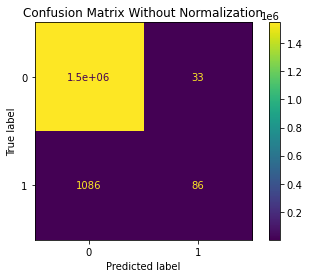

In [46]:
plt.figure(figsize=(8, 6)) 
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [47]:
print(classification_report(y_test , y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1549240
           1       0.72      0.07      0.13      1172

    accuracy                           1.00   1550412
   macro avg       0.86      0.54      0.57   1550412
weighted avg       1.00      1.00      1.00   1550412



In [48]:
Accuracy_1 = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy Score : {Accuracy_1 * 100 : .2f} %\n')


Precision_1 = precision_score(y_test, y_pred_LR)
print(f'Precision Score : {Precision_1 * 100 : .2f} %\n')


Recall_1 = recall_score(y_test, y_pred_LR)
print(f'Recall Score : {Recall_1 * 100 : .2f} %\n')


F1_Score_1 = f1_score(y_test, y_pred_LR)
print(f'F1 Score : {F1_Score_1 * 100 : .2f} %\n')


ROC_AUC_1 = roc_auc_score(y_test, y_pred_LR)
print(f'AUC_ROC : {ROC_AUC_1 * 100 : .2f} %\n')

Accuracy Score :  99.93 %

Precision Score :  72.27 %

Recall Score :  7.34 %

F1 Score :  13.32 %

AUC_ROC :  53.67 %



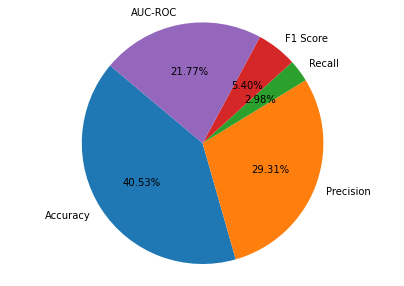

In [49]:
Scores_1 = [Accuracy_1, Precision_1, Recall_1, F1_Score_1, ROC_AUC_1]
Score_Names_1 = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

plt.figure(figsize=(7, 5))
plt.pie(Scores_1, labels=Score_Names_1, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

**DECISION TREE CLASSIFIER**

In [51]:
Model_2 = DecisionTreeClassifier()
Model_2.fit(x_train_scaled, y_train)
y_pred_DT = Model_2.predict(x_test_scaled)

Train_Accuracy = Model_2.score(x_train_scaled, y_train)
Test_Accuracy = Model_2.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.97 %


CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [53]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1549240
           1       0.82      0.82      0.82      1172

    accuracy                           1.00   1550412
   macro avg       0.91      0.91      0.91   1550412
weighted avg       1.00      1.00      1.00   1550412



Accuracy_2 = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy Score : {Accuracy_2 * 100 : .2f} %\n')


Precision_2 = precision_score(y_test, y_pred_DT)
print(f'Precision Score : {Precision_2 * 100 : .2f} %\n')


Recall_2 = recall_score(y_test, y_pred_DT)
print(f'Recall Score : {Recall_2 * 100 : .2f} %\n')


F1_Score_2 = f1_score(y_test, y_pred_DT)
print(f'F1 Score : {F1_Score_2 * 100 : .2f} %\n')


ROC_AUC_2 = roc_auc_score(y_test, y_pred_DT)
print(f'AUC_ROC : {ROC_AUC_2 * 100 : .2f} %\n')

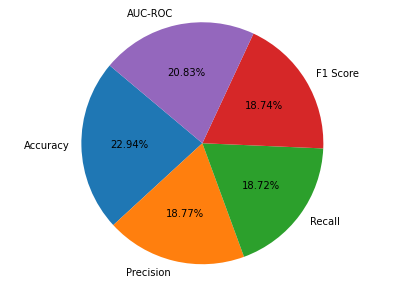

In [55]:
Scores_2 = [Accuracy_2, Precision_2, Recall_2, F1_Score_2, ROC_AUC_2]
Score_Names_2 = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

plt.figure(figsize=(7, 5))
plt.pie(Scores_2, labels=Score_Names_2, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

**NAIVE BAYES CLASSIFIER MODEL**

In [57]:
Model_3 = GaussianNB()
Model_3.fit(x_train_scaled, y_train)
y_pred_NB = Model_3.predict(x_test_scaled)

Train_Accuracy = Model_3.score(x_train_scaled, y_train)
Test_Accuracy = Model_3.score(x_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 97.67 %
Testing accuracy: 97.67 %


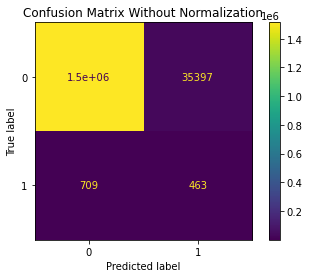

In [58]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [59]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1549240
           1       0.01      0.40      0.03      1172

    accuracy                           0.98   1550412
   macro avg       0.51      0.69      0.51   1550412
weighted avg       1.00      0.98      0.99   1550412



In [60]:
Accuracy_3 = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy Score : {Accuracy_3 * 100 : .2f} %\n')


Precision_3 = precision_score(y_test, y_pred_NB)
print(f'Precision Score : {Precision_3 * 100 : .2f} %\n')


Recall_3 = recall_score(y_test, y_pred_NB)
print(f'Recall Score : {Recall_3 * 100 : .2f} %\n')


F1_Score_3 = f1_score(y_test, y_pred_NB)
print(f'F1 Score : {F1_Score_3 * 100 : .2f} %\n')


ROC_AUC_3 = roc_auc_score(y_test, y_pred_NB)
print(f'AUC_ROC : {ROC_AUC_3 * 100 : .2f} %\n')

Accuracy Score :  97.67 %

Precision Score :  1.29 %

Recall Score :  39.51 %

F1 Score :  2.50 %

AUC_ROC :  68.61 %



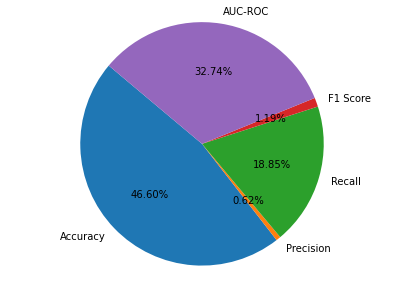

In [63]:
Scores_3 = [Accuracy_3, Precision_3, Recall_3, F1_Score_3, ROC_AUC_3]
Score_Names_3 = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

plt.figure(figsize=(7, 5))
plt.pie(Scores_3, labels=Score_Names_3, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

**CONCLUSIONS**

In [64]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_1*100), (Accuracy_2*100), (Accuracy_3*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.927826
1,Decision Tree,99.972330
2,Naive Bayes,97.671200
